C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default)

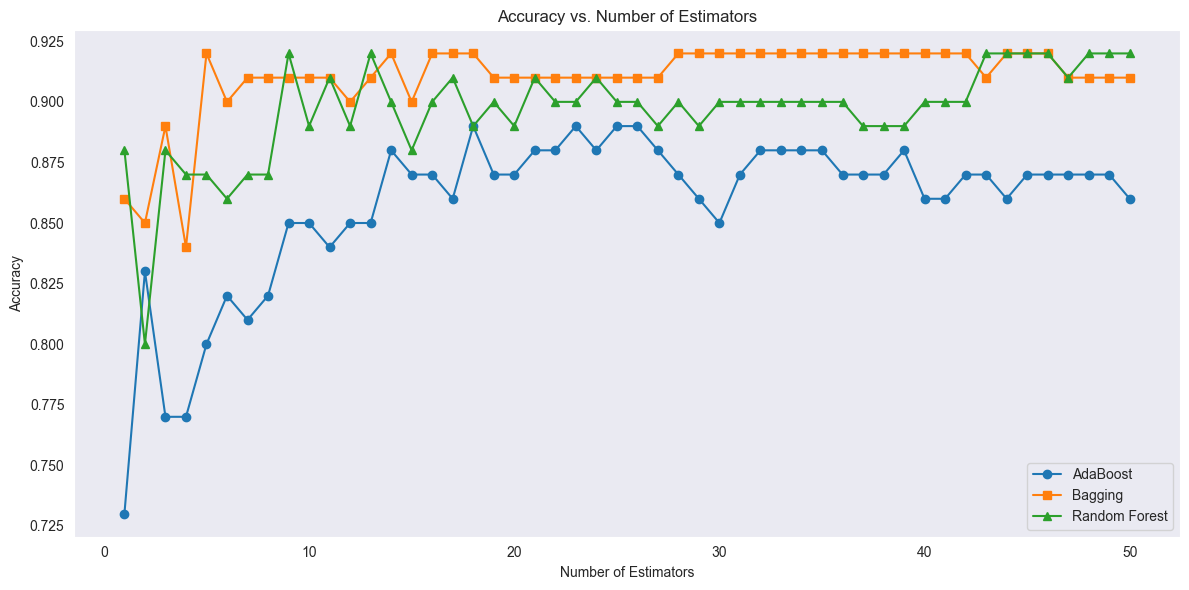

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic dataset
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
max_estimators = 50
estimators_range = range(1, max_estimators + 1)

ada_accuracies = []
bagging_accuracies = []
rf_accuracies = []

# Train and evaluate each model for different numbers of estimators
for n_estimators in estimators_range:
    # AdaBoost
    ada = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=n_estimators,
        random_state=42
    )
    ada.fit(X_train, y_train)
    ada_preds = ada.predict(X_test)
    ada_accuracies.append(accuracy_score(y_test, ada_preds))
    
    # Bagging
    bagging = BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=n_estimators,
        random_state=42
    )
    bagging.fit(X_train, y_train)
    bagging_preds = bagging.predict(X_test)
    bagging_accuracies.append(accuracy_score(y_test, bagging_preds))
    
    # Random Forest
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        random_state=42
    )
    rf.fit(X_train, y_train)
    rf_preds = rf.predict(X_test)
    rf_accuracies.append(accuracy_score(y_test, rf_preds))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(estimators_range, ada_accuracies, label='AdaBoost', marker='o')
plt.plot(estimators_range, bagging_accuracies, label='Bagging', marker='s')
plt.plot(estimators_range, rf_accuracies, label='Random Forest', marker='^')

plt.title('Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
